In [1]:
import json
import matplotlib.pyplot as plt

In [121]:
projects = [
    "guava",
    "jackson",
    "junit4",
    "lombok",
    "mockito",
    "netty"
]

In [3]:
def readProjectData(projectName, generation):
    with open(f"../results/{generation}/{projectName}.json") as f:
        data = json.load(f)
        data.pop("commitsSize")
        return data

def getPropertyPlotData(projectData, evaluation, propertyName):
    x, y = [], []
    
    for key, value in projectData.items():
        y_value = value[evaluation][propertyName]
        if y_value == 'NaN': continue
        
        x.append(key)
        y.append(y_value)
    
    return x, y

In [87]:
def plotNavigation(generation):
    evaluation = "navigation"
    figure = plt.figure(figsize=(15, 7))

    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    axFairPrecision = plt.subplot2grid((2,6), (0,2), colspan=2)
    axRecall = plt.subplot2grid((2,6), (0,4), colspan=2)
    axFairRecall = plt.subplot2grid((2,6), (1,1), colspan=2)
    axCorrectInTop = plt.subplot2grid((2,6), (1,3), colspan=2)
    
    axPrecision.set_xlabel("Minimum support")
    axFairPrecision.set_xlabel("Minimum support")
    axRecall.set_xlabel("Minimum support")
    axFairRecall.set_xlabel("Minimum support")
    axCorrectInTop.set_xlabel("Minimum support")
    
    axPrecision.set_ylabel("Precision")
    axFairPrecision.set_ylabel("Fair precision")
    axRecall.set_ylabel("Recall")
    axFairRecall.set_ylabel("Fair recall")
    axCorrectInTop.set_ylabel("Correct in top")
    
    for project in projects:
        data = readProjectData(project, generation)
        project = project.capitalize()
        
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        axFairPrecision.plot(*getPropertyPlotData(data, evaluation, "fairPrecision"), label=project)
        axRecall.plot(*getPropertyPlotData(data, evaluation, "recall"), label=project)
        axFairRecall.plot(*getPropertyPlotData(data, evaluation, "fairRecall"), label=project)
        axCorrectInTop.plot(*getPropertyPlotData(data, evaluation, "fairCorrectInTop"), label=project)
        
    axPrecision.legend()
    axFairPrecision.legend()
    axRecall.legend()
    axFairRecall.legend()
    axCorrectInTop.legend()
    
    figure.tight_layout()
    
    
def plotPrevention(generation):
    evaluation = "prevention"
    figure = plt.figure(figsize=(15, 10))
        
    axFairPrecision = plt.subplot2grid((2,6), (0,2), colspan=2)
    axRecall = plt.subplot2grid((2,6), (0,4), colspan=2)
    
    axFairPrecision.set_xlabel("Minimum support")
    axRecall.set_xlabel("Minimum support")

    axFairPrecision.set_ylabel("Fair precision")
    axRecall.set_ylabel("Recall")
    
    for project in projects:
        data = readProjectData(project, generation)
        project = project.capitalize()
        
        axFairPrecision.plot(*getPropertyPlotData(data, evaluation, "fairPrecision"), label=project)
        axRecall.plot(*getPropertyPlotData(data, evaluation, "recall"), label=project)
        
    axFairPrecision.legend()
    axRecall.legend()
    
    figure.tight_layout()
    

def plotFalseAlarm(generation):
    evaluation = "falseAlarm"
    figure = plt.figure(figsize=(15, 10))
        
    axPrecision = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=figure)
    
    axPrecision.set_xlabel("Minimum support")
    axPrecision.set_ylabel("Precision")
    
    for project in projects:
        data = readProjectData(project, generation)
        project = project.capitalize()
        axPrecision.plot(*getPropertyPlotData(data, evaluation, "precision"), label=project)
        
    axPrecision.legend()
    
    figure.tight_layout()

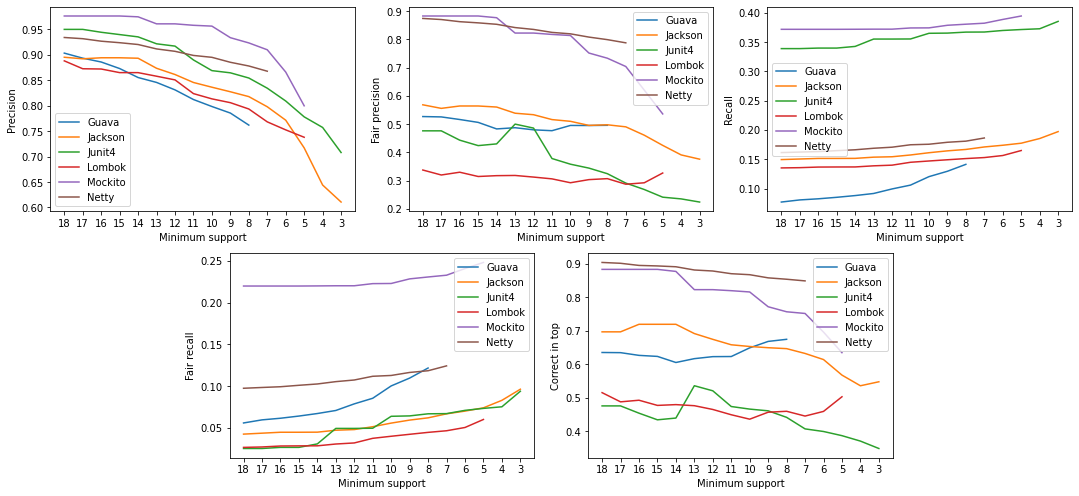

In [129]:
plotNavigation('gen8_max5_30s')

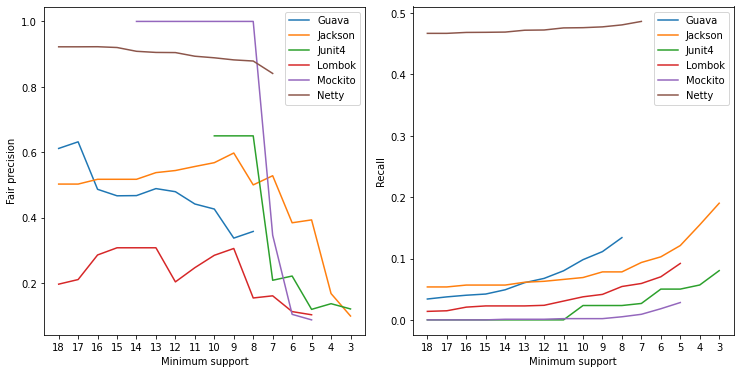

In [130]:
plotPrevention('gen8_max5_30s')

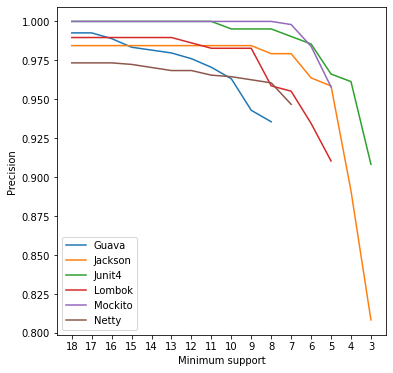

In [127]:
plotFalseAlarm('gen8_max5_30s')

In [256]:
def plotProperty(evaluation, property_name, property_display_name):
    figure = plt.figure(figsize=(6, 6))
    for project in projects:
        data = readProjectData(project, 'gen8_max5_30s')
        plt.plot(*getPropertyPlotData(data, evaluation, property_name), label=project.capitalize())
    plt.legend()
    plt.xlabel("Minimum support", fontsize=13)
    plt.ylabel(property_display_name, fontsize=13)
    plt.title("Correctness", fontsize=15)
    #plt.savefig(f"../pics/{evaluation}_{property_name}.png")

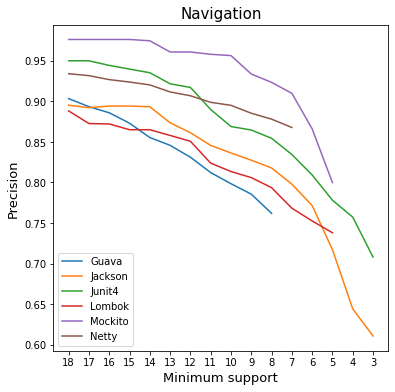

In [245]:
plotProperty('navigation', 'precision', "Precision")

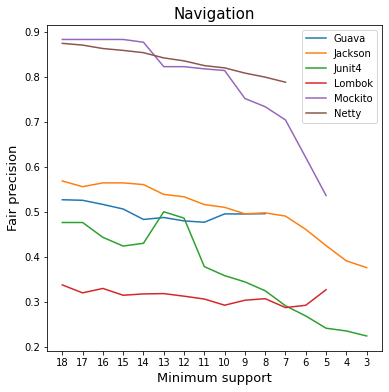

In [246]:
plotProperty('navigation', 'fairPrecision', "Fair precision")

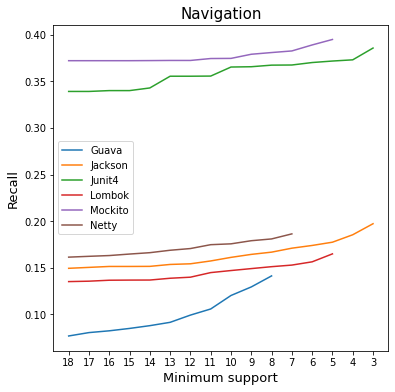

In [247]:
plotProperty('navigation', 'recall', "Recall")

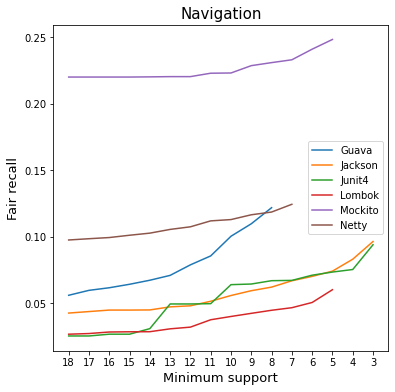

In [248]:
plotProperty('navigation', 'fairRecall', "Fair recall")

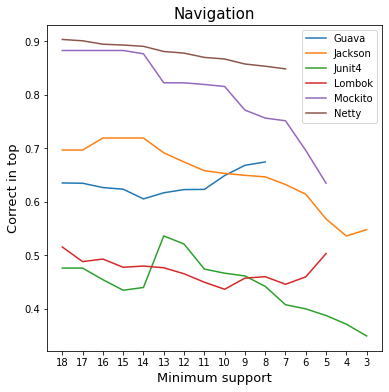

In [249]:
plotProperty('navigation', 'fairCorrectInTop', "Correct in top")

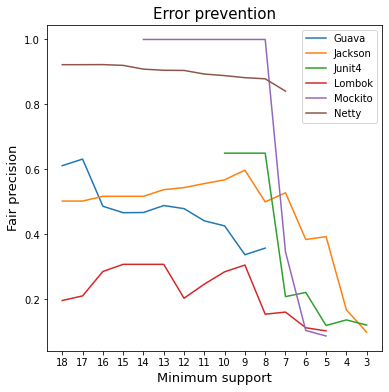

In [254]:
plotProperty('prevention', 'fairPrecision', "Fair precision")

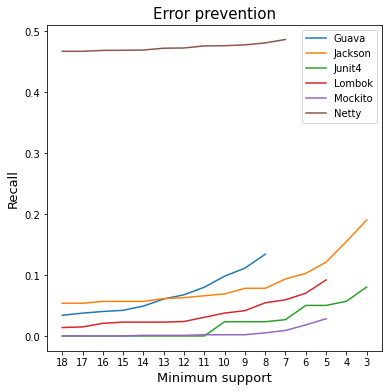

In [255]:
plotProperty('prevention', 'recall', "Recall")

In [ ]:
plotProperty('falseAlarm', 'precision', "Precision")

In [160]:
def plotCommitsSize():
    x, y = [], []
    for project in projects:
        x.append(project.capitalize())
        with open(f"../results/gen8_max5_30s/{project}.json") as f:
            y.append(json.load(f)["commitsSize"])
    plt.bar(x, y, width = 0.5)
    plt.ylabel("Number of commits")
    #plt.savefig(f"../pics/commits_size.png")

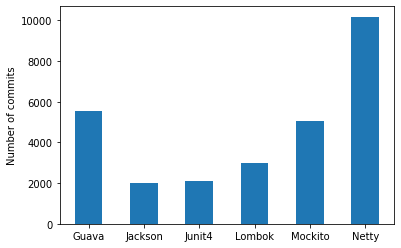

In [161]:
plotCommitsSize()